# Module 4 Machine Learning Methods

## Our Goal: To make predictions from text data using machine learning methods

## Text processing pipeline

A text processing pipeline, in the context of natural language processing (NLP) and text analysis, refers to a series of sequential steps or stages through which a piece of text is processed to extract meaningful information or perform various tasks. 

These pipelines are commonly used in NLP applications to transform *raw text data* into *structured, cleaned, and often enriched data* that can be used for tasks like sentiment analysis, information retrieval, text classification, and more. 

The specific steps in a text processing pipeline can vary depending on the task and the desired outcomes, but here are some common components:

### 1.  Raw text input

   The first step is to take the raw text as input. This text can be a single sentence, a paragraph, a document, or a collection of documents.

### 2. Text preprocessing 

Preprocessing raw text data utilizes natural language processing techniques. these techniques are:

#### 2.1 Tokenization 

Tokenization is the process of breaking down the text into smaller units, such as words or subword units (subword tokenization is often used for languages like Chinese or Japanese). Tokens are the basic building blocks for further analysis.
    
#### 2.2 Text Cleaning
    
This step involves cleaning the text data, which may include tasks like removing punctuation, special characters, or HTML tags, converting text to lowercase, and handling other data-specific issues like removing stop words (common words that do not carry much meaning) or dealing with text encoding problems.

#### 2.3 Normalization

Text normalization involves transforming text data to a standard format. For example, you might replace abbreviations with their full forms (e.g., "Mr." to "Mister") or perform stemming or lemmatization to reduce words to their root form.


<br>

```
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def set_clean(raw_text):
    set_stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    
    no_punc = re.sub(r'[^\w\s]', '', raw_text)
    lowercase_no_punc = no_punc.lower()
    tokenized_text= word_tokenize(lowercase_no_punc)
    no_stop = [w for w in tokenized_text if w not in set_stop_words]
    lc_text = [lemmatizer.lemmatize(word, pos="v") for word in no_stop]
    lc_text = [lemmatizer.lemmatize(word, pos="n") for word in lc_text]
    lc_text = [lemmatizer.lemmatize(word, pos="a") for word in lc_text]
    lc_text = [lemmatizer.lemmatize(word, pos="r") for word in lc_text]
    lc_text = [lemmatizer.lemmatize(word, pos="s") for word in lc_text]
    return(lc_text)
```

### 3. Feature extraction/Encoding/Embedding

In this step, you extract relevant features from the text. These features can include one-hot encoding, bag-of-words representations, term frequency-inverse document frequency (TF-IDF) vectors, or word embeddings like `Word2Vec` or `GloVe`.

#### 3.1 Bag-of-Words

<br>

```
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
```

<br>

#### 3.2 TF-IDF

```
from sklearn.feature_extraction.text import TfidfVectorizer
# Create an instance of TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
```

### 4. Modeling 

Design a model (e.g., neural networks, decision trees, etc.).
 *   Fit model parameters to training data.
 *   Optimize using an optimization procedure.
 *   Make predictions on unseen data.

we will be using the supervised learning models in regression and classification

We will focus on putting into practice the following machine learning algorithms

*  support vector machines (SVM)
*  random forest
*  naive Bayes
*  regularized linear models

<br>


**scikit-learn workflow syntax**

`scikit-learn` follows the same syntax for all supervised learning models, which makes the workflow repeatable

```
# import a model, the algorithm for our supervised learning problem
from sklearn.module import Model

# create a variable and instantiate the model
model = Model()

# fit the model to the data to learn patterns about X, the features and y, the target 
model.fit(X,y)

# makes prediction by passing new observations
model.predict(X_new)
```

### 5. Measure model performance

#### 5.1 Metrics for measuring regression model performance

In scikit-learn (sklearn), when dealing with regression tasks, we have  several metrics to use that measure the accuracy of our regression model.

#####  5.1.1  Mean Absolute Error (MAE)

MAE is the average of the absolute differences between the predicted and actual values. It provides a measure of the average magnitude of errors in the predictions.

The formula for calculate MAE:

$$\text{MAE} = \frac{1}{n} \times \sum{|y_i - \hat{y}_i|}$$


where

*   $\text{MAE}$ is the Mean Absolute Error.
*   $n$ is the number of data points in the dataset.
*   $y_i$ represents the actual or observed value for the $i$-th data point.
*   $\hat{y}_i$ represents the predicted value for the $i$-th data point.
*   $\sum$ denotes the sum over all data points, from $i = 1$ to $n$.

<br>

From scikit-learn:

```
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true, y_pred)
```



##### 5.1.2 Mean Squared Error (MSE)

MSE is the average of the squared differences between the predicted and actual values. It penalizes larger errors more heavily than smaller ones. RMSE is the square root of MSE.


The formula for `RMSE` is given by:

$$\text{RMSE} = \sqrt{ \frac{1}{n}\times\sum(y_i - \hat{y}_i)^2}$$

where 
*   $n$ is the number of data points.
*   $y_i$ is the actual observed value for the $i$-th data point.
*   $\hat{y}_i$ is the predicted value for the $i$-th data point.

Lower RMSE values indicate that the model is making more accurate predictions.

<br>

From scikit-learn:

```
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_true, y_pred)

# for root mean squared error
rmse = mean_squared_error(y_true, y_pred, squared=False)
```



##### 5.1.3 R-squared (R2) Score

R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables. 

It ranges from `0` to `1`.

An `R^2` value of `1` means that the model perfectly predicts the target variable, while an `R^2` of `0` means the model provides no better prediction than the mean of the target variable.

The formula for `R^2` is given by:

$$R^2 = 1 - \dfrac{\displaystyle{\sum (y_i - \hat{y}_i)^2}}{\displaystyle{\sum(y_i - \hat{y})^2}}$$

where

*   $n$ is the number of data points.
*   $y_i$ is the actual observed value for the $i$-th data point.
*   $\hat{y}_i $ is the predicted value for the $i$-th data point.
*   $\hat{y}$ is the mean of the actual observed values (target).

`R^2` is used to assess how well the model captures the variance in the target variable. 

A higher `R^2` indicates that the  model explains a larger portion of the variance, and therefore, it is a better fit to the data.

<br>

From scikit-learn:

```
from sklearn.metrics import r2_score
r_squared = r2_score(y_true, y_pred)
```

#### 5.2 Metrics for measuring classification model performance

In scikit-learn, there are several metrics commonly used to measure the accuracy of classification models. 



##### 5.2.1 Confusion Matrix (confusion_matrix)

The confusion matrix is typically used in binary classification problems, where you have two classes: a positive class and a negative class. 

In binary classification, `confusion matrix` provides a breakdown of true positive, true negative, false positive, and false negative predictions. It can be useful for understanding the types of errors your classifier is making.

*   True Positives (TP): The number of instances where the model correctly predicted the positive class.
*   False Positives (FP): The number of instances where the model incorrectly predicted the positive class when the actual class was negative.
*   True Negatives (TN): The number of instances where the model correctly predicted the negative class.
*   False Negatives (FN): The number of instances where the model incorrectly predicted the negative class when the actual class was positive.


<br>

```
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true, y_pred)
```

<br>


##### 5.2.2 Accuracy Score (accuracy_score)

This is one of the simplest and most widely used metrics for classification. It calculates the proportion of correctly predicted instances out of the total instances.

$$\text{accuracy}=\dfrac{\text{number of correct predictions}}{\text{total number of observations}}$$

$$\text{Accuracy} = \dfrac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}$$

<br>

```
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true, y_pred)
```

<br>

##### 5.2.3 Precision (precision_score)

`Precision` is the ratio of true positives to the total number of positive predictions. It measures the ability of the classifier to avoid false positive predictions.

$$\text{Precision} =  \dfrac{\text{TP}}{\text{TP} + \text{FP}}$$

<br>

```
from sklearn.metrics import precision_score
precision = precision_score(y_true, y_pred)
```
<br>



##### 5.2.4 Recall (recall_score): 

`Recall`, also known `as sensitivity` or `true positive rate`, is the ratio of true positives to the total number of actual positives. It measures the ability of the classifier to find all positive instances.


$$\text{Recall} = \dfrac{\text{TP}}{\text{TP} + \text{FN}}$$
<br>

```
from sklearn.metrics import recall_score
recall = recall_score(y_true, y_pred)
```

<br>

##### 5.2.5  F1-Score (f1_score): 

The `F1-Score` is the `harmonic mean` of precision and recall. It provides a balance between these two metrics.

The F1 score is a measure of a model's accuracy, particularly in binary classification problems, and it is calculated based on `precision` and `recall`. The formula for the F1 score is as follows:

$$\text{F1 Score} = 2 * \dfrac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

<br>

```
from sklearn.metrics import f1_score
f1 = f1_score(y_true, y_pred)
```

<br>

##### 5.2.6  ROC-AUC Score (roc_auc_score)

This metric is used for binary classification problems and measures the area under the `Receiver Operating Characteristic` (ROC) curve. It quantifies the model's ability to distinguish between the two classes.


<br>

```
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_true, y_score)
```

*   `y_true` contains the true class labels (0 or 1)

*    `y_scores` contains the predicted probabilities of belonging to the positive class.

<br>


ROC-AUC is a value that ranges between `0` and `1`, where:

*   An AUC of `0.5` indicates a model that performs no better than random chance (equivalent to the diagonal line in the ROC curve).

*   An AUC of 1 indicates a perfect model that perfectly separates the positive and negative classes.



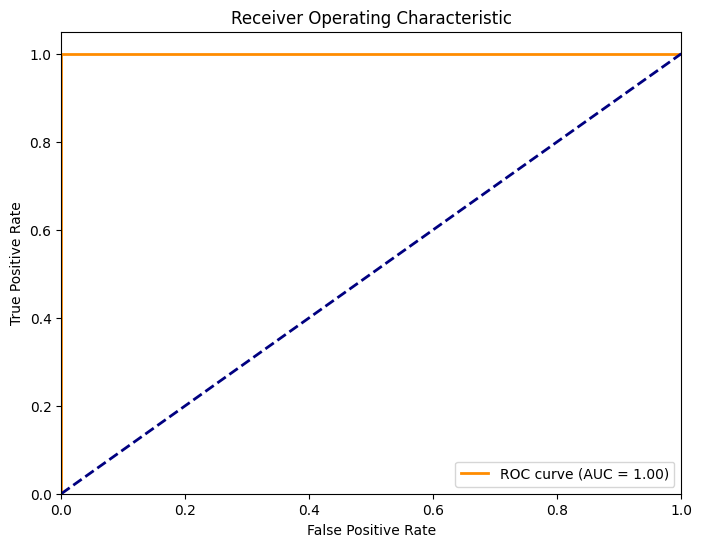

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have predicted probabilities and true labels

# Generate hypothetical true labels and predicted scores
y_true = np.array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1])
y_scores = np.array([0.2, 0.7, 0.8, 0.9, 0.3, 0.4, 0.6, 0.1, 0.85, 0.95])

# Calculate the ROC curve: 
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# Calculate the AUC (Area Under the Curve) for the ROC curve
roc_auc = auc(fpr, tpr)


# Plot the ROC curve:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [20]:
print(roc_auc)

1.0


## 6. Overfitting and underfitting

These are two common problems in machine learning and statistical modeling, particularly in the context of supervised learning. They refer to how well a model generalizes from the training data to unseen or new data:

**Overfitting**

*   Overfitting occurs when a machine learning model learns to perform extremely well on the training data but fails to generalize to new, unseen data.
*   The model fits the training data too closely, capturing noise and random fluctuations in the data, rather than the underlying patterns.
*   As a result, the model's performance on the validation or test data is significantly worse than on the training data.
*   Overfitting is often characterized by high model complexity, including many parameters or features, and it can be caused by excessive training time or over-complex models.

**Underfitting**

*   Underfitting, on the other hand, occurs when a machine learning model is too simple to capture the underlying patterns in the training data.
*   The model fails to learn from the training data effectively, resulting in poor performance on both the training and validation or test data.
*   Underfit models are usually characterized by insufficient complexity or a lack of relevant features, leading to overly generalized representations.


Some common techniques to address overfitting and underfitting include:


###  6.1 Regularization: 

Regularization is a technique used in machine learning to prevent overfitting, which occurs when a model performs well on the training data but poorly on unseen or test data. 

Scikit-learn, a popular Python machine learning library, provides several methods for implementing regularization in various machine learning models.
Applying techniques like `L1` and `L2` regularization to limit the complexity of the model.

 Regularization methods help prevent overfitting by adding a `penalty term` to the loss function that discourages the model from fitting the training data too closely.

#### 6.1.1 `L1` and `L2` Regularization (Lasso and Ridge)

*   **sklearn.linear_model.Lasso**: This implements L1 regularization, which adds the absolute values of the coefficients to the loss function.

*   **sklearn.linear_model.Ridge**: This implements L2 regularization, which adds the square of the coefficients to the loss function.

### 6.1.2 Regularization in scikit-learn's SVM 

It is primarily achieved through two parameters: `C` and *kernel-related hyperparameters*.

*   **C Parameter**: In scikit-learn's SVM implementation, the `C` parameter is one of the primary tools for regularization. C controls the trade-off between maximizing the margin and minimizing the classification error. 
    *   A smaller C encourages a larger margin but may misclassify some training points. 
    *   A larger C allows the model to classify more training points correctly but may result in a smaller margin. 
    *   In essence, a smaller C leads to a more regularized model, while a larger C leads to a less regularized model.

<br>

```
from sklearn.svm import SVC
model = SVC(C=1.0)  # default. Adjust C as needed
```

*   **Kernel Parameters**: If you are using non-linear SVMs (using kernels like RBF), the choice of kernel and its associated hyperparameters can also be a form of regularization. For instance, the gamma parameter controls the shape of the decision boundary and can be seen as a form of regularization.

<br>

```
from sklearn.svm import SVC
# Adjust C and gamma as needed
# non-linear kernel
model = SVC(kernel='rbf', C=1.0, gamma=0.1)  

```


### 6.2 Cross-validation: 

Splitting the data into multiple folds and assessing model performance on different subsets of the data to evaluate generalization.

One common form of cross-validation is k-fold cross-validation, where the dataset is divided into "k" subsets or folds. The model is trained and tested "k" times, with each fold being used as a testing set exactly once and the remaining folds as the training set. The results are then averaged to obtain a more reliable estimate of the model's performance.


Here's how cross-validation works:

**Data Splitting**: The dataset is divided into `K` subsets of roughly equal size. Common choices for `K` are `5` or `10`, but it can vary depending on the specific application.

**Iteration**: The modeling process is repeated `K` times. In each iteration, one of the `K` subsets is held out as the validation set, while the remaining `K-1` subsets are used for training the model.

**Performance Evaluation**: The model is trained on the `K-1` subsets and then evaluated on the validation set. The performance metric (e.g., `accuracy`, `mean squared error`) is recorded for each iteration.

**Average Performance**: The performance metrics from all `K` iterations are typically averaged to provide an overall assessment of the model's performance.



We will be using **K-Fold Cross-Validation** 

The dataset is divided into `K` subsets of approximately equal size. The model is trained and evaluated `K` times, with each fold used once as the validation data.


<br>

```
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Create a K-fold cross-validator
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and calculate 'neg_mean_squared_error'
scores = cross_val_score(svm_regressor, X, y, cv=cv, scoring='neg_mean_squared_error')


# Calculate the average RMSE score
avg_rmse = np.mean(np.sqrt(-scores))

# Calculate the R^2 score
r2_scores = cross_val_score(svm_regressor, X, y, cv=cv, scoring = 'r2'))

r2 = np.mean(r2_scores)
```